# **Computer Lab 2 - Hugo Queniat**

In [1]:
# Change here using YOUR own first and last names
fn1 = "hugo"
ln1 = "queniat"
filename = "_".join(map(lambda s: s.strip().lower(),
                        ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

In [2]:
#imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import time
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

## **Question 1 - Preprocessing the data**

### a) Setting the random seed to 0

In [3]:
np.random.seed(0)

### b) Loading the data

In [4]:
# 1. Load the data

with open('meatspec.csv') as csvfile:
    table = pd.read_csv(csvfile, delimiter=',', header=0)
    table.head()
    display(table)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,3.14626,3.15166,3.15703,3.16244,3.16791,3.17348,3.17923,3.18521,3.19140,3.19792,...,3.61483,3.59695,3.57915,3.56142,3.54365,3.52563,3.50705,3.48765,3.46769,31.3
211,2.57992,2.58040,2.58099,2.58175,2.58266,2.58381,2.58530,2.58719,2.58949,2.59225,...,2.95464,2.93756,2.92062,2.90367,2.88668,2.86951,2.85180,2.83347,2.81473,33.8
212,2.56875,2.56923,2.56985,2.57060,2.57150,2.57268,2.57420,2.57610,2.57841,2.58129,...,2.94870,2.93226,2.91592,2.89952,2.88291,2.86595,2.84836,2.82998,2.81111,35.5
213,2.65884,2.65943,2.66023,2.66108,2.66215,2.66360,2.66550,2.66787,2.67070,2.67405,...,3.04851,3.03351,3.01851,3.00327,2.98759,2.97121,2.95374,2.93514,2.91564,42.5


In [5]:
# 2. Show mean and standard deviation of each column
table.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2.808561,2.811137,2.813727,2.816363,2.819098,2.821983,2.825064,2.828375,2.831943,2.835813,...,3.178262,3.158254,3.138534,3.119104,3.099971,3.081070,3.062290,3.043548,3.024895,18.142326
std,0.410793,0.413352,0.415906,0.418465,0.421040,0.423635,0.426245,0.428866,0.431510,0.434195,...,0.541957,0.541776,0.541519,0.541135,0.540563,0.539730,0.538586,0.537108,0.535354,12.740297
min,2.066420,2.065830,2.065180,2.064650,2.064170,2.063730,2.063400,2.063140,2.063010,2.063170,...,2.339720,2.320940,2.300430,2.280180,2.260580,2.241710,2.223520,2.206020,2.189130,0.900000
25%,2.512265,2.513260,2.514210,2.515330,2.516775,2.518240,2.518305,2.518605,2.519185,2.521480,...,2.781960,2.763715,2.741450,2.722130,2.702475,2.682635,2.664900,2.647370,2.628230,7.300000
50%,2.753600,2.755180,2.756680,2.758240,2.759860,2.761610,2.763550,2.765680,2.768660,2.770720,...,3.079400,3.058200,3.036290,3.014480,2.993020,2.971850,2.953740,2.935140,2.915640,14.000000
75%,3.006155,3.010470,3.014840,3.019260,3.025895,3.032780,3.039780,3.046930,3.054310,3.061875,...,3.493140,3.477830,3.462340,3.446320,3.429490,3.411360,3.393100,3.375965,3.358195,28.000000
max,4.237280,4.247210,4.257370,4.267730,4.278470,4.289680,4.301330,4.313310,4.325870,4.339270,...,5.128190,5.111870,5.095180,5.077600,5.058950,5.038260,5.015710,4.991070,4.965430,49.100000


The data is not centered (mean around 2.8 instead of 0), not normalized (values between 2 and 4.5 instead of between 0 and 1) and not standardized (std around 0.4 instead of 1).

### c) Preprocessing the data

In [6]:
# Preprocessing

# Separating the covariates from the target variable
X = np.array(table.drop('fat', axis=1)) # fat is the column I want to predict
y = np.array(table['fat']) # fat is the column I want to predict

# Splitting the dataset into the Training set and Test set, 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training set and transform the training set
X_train = scaler.fit_transform(X_train)
# Transform the testing set using the same scaler
X_test = scaler.transform(X_test)

# Same for the target variable
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.transform(y_test.reshape(-1, 1))

The dataset has been separated into a training set (75%) and a test set (25%). It has been standardized and normalized through the Scaler.

### d) Fitting a regular OLS regression

Even though we centered the covariates, which should make us believe we should not fit the intercept, it is better to keep it. Indeed, as described in the beginning of the lab, we do not know whether all the covariates are relevant or not. Thus, we should keep the intercept to be able to fit the model on the whole dataset.

In [7]:
# Creating the model and fitting it to the training set

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

### e) Store the R2 coefficients

In [8]:
# Creating a dataframe to store the results for the rest of the lab

df_coef = pd.DataFrame(columns=['R-squared'], index=['First OLS'])

# R-squared of the OLS regression
test_r2 = model.score(X_test, y_test)

# Adding the R-squared to the dataframe
df_coef.loc['First OLS', 'R-squared'] = test_r2

# To show the R-squared of the OLS regression within the frame
display(df_coef)

,R-squared
First OLS,0.960055


The R-squared coefficient is 0.96, which is very high. This means that the model explains 96% of the variance of the data. 

## **Variable selection**

### 2) Coding and Running the Forward Variable Selection

I am coding the method of forward variable selection. The method starts with no covariates at all, and adds one at each step. The criterion used to select the best covariate is to choose the one that maximises the statistic of the test of no effect.

Hence, at each step, we choose each covariate $\tilde X_k$ so that it maximises the following statistic:

$$ T(Y, \tilde X_k) = \frac{\hat \theta_n(Y, \tilde X_k)}{\hat \sigma_n(Y, \tilde X_{k}) \hat s_n} $$


where $ \hat \theta_n(Y, \tilde X_k) = \argmin_{\theta_0, \theta_1 \in \mathbb R} || Y - \theta_O 1_n - \theta_1 \tilde X_k ||^2 $ is the OLS estimator of the model $Y = \theta_0 + \theta_1 \tilde X_k$.

where $\hat \sigma_n(Y, \tilde X_k) = \frac{1}{n-2} || Y - (1_n, \tilde X_k) \hat \theta_n(Y, \tilde X_k)||^2$ is the noise level of the model $Y = \theta_0 + \theta_1 \tilde X_k$.

where $\hat G_n(\tilde X_k) = \frac{1}{n} (1_n,\tilde X_k)^T (1_n,\tilde X_k)$ is the Gram matrix of the model $Y = \theta_0 + \theta_1 \tilde X_k$.

where $\hat s_n(\tilde X_k)^2 = e_1^T \hat G_n(\tilde X_k)^{-1} e_1$.

In [9]:
# Code for the forward variable selection and that computes the p_values to show them later

def forward_variable_selection(X, y):
    # Get the dimensions of the data
    n, p = X.shape
    # Create my linear regression model that will be used in each step
    model = LinearRegression(fit_intercept=True)
    # Initialize empty lists to hold the selected covariates and p-values
    selected_covariates = []
    p_values = []
    # Create a list of all the remaining covariates to be evaluated (at the beginning all the covariates are remaining)
    remaining_covariates = list(range(p))
    # Initialize the residual to be the entire response variable (at the beginning there is no covariate in the model)
    residual = y
    # Continue selecting covariates until there are no more remaining covariates
    while remaining_covariates:
        # Initialize the highest T statistic to be -1 (so that any T statistic will be higher than it)
        highest_T_stat = -1
        # Set the output to be the current residual
        output_y = residual
        # Initialize the best covariate to be none, it will be updated in the loop
        best_covariate = None
        # Loop through all the remaining covariates and find the covariate with the highest T statistic
        for covariate in remaining_covariates:
            # Create a matrix of input covariates and a vector of output covariates
            input_covariates = np.stack((np.ones(n), X[:, covariate]), axis=1)
            # Fit the linear regression model and get the coefficients
            model.fit(input_covariates, output_y)
            Theta_hat = model.coef_.T
            # Compute the prediction given by the model
            prediction = model.predict(input_covariates)
            # Compute the Gram matrix and sigma hat
            Gram_hat = (1/n) * ( input_covariates.T @ input_covariates )
            sigma_hat = (1 / (n - 2)) * (np.linalg.norm(output_y - prediction)**2)
            # Compute s_n_hat
            s_n_hat = np.linalg.inv(Gram_hat)[0][0]
            # Compute the T statistic for this covariate
            T_stat = ( np.sqrt(n) * np.linalg.norm(Theta_hat, 1) ) / (sigma_hat * np.sqrt(s_n_hat))
            # Update the highest T statistic and best covariate if this one is better
            if T_stat > highest_T_stat:
                highest_T_stat = T_stat
                best_covariate = covariate
                residual = output_y - prediction
        # Add the best covariate to the list of selected covariates and remove it from the list of remaining covariates
        selected_covariates.append(best_covariate)
        remaining_covariates.remove(best_covariate)
        # Compute the p-value for this covariate and add it to the list of p-values
        p_values.append(2 * (1 - stats.norm.cdf(highest_T_stat)))
    # Return the selected covariates and p-values
    return selected_covariates, p_values




In [10]:
# Order of selection of the variables and their associated p_values

order, p_values = forward_variable_selection(X_train, y_train)

print('The order of the variables is: ', order)
print("\n")
print('The p_values are: ', p_values)



The order of the variables is:  [40, 7, 39, 6, 41, 8, 38, 5, 42, 9, 37, 4, 36, 10, 97, 3, 43, 11, 35, 2, 96, 12, 98, 13, 34, 1, 44, 0, 95, 14, 33, 15, 99, 16, 32, 17, 94, 18, 93, 19, 45, 64, 31, 65, 92, 63, 91, 66, 90, 67, 30, 20, 89, 62, 88, 68, 46, 61, 87, 69, 86, 60, 85, 53, 29, 52, 84, 70, 83, 54, 28, 59, 82, 21, 47, 55, 81, 58, 27, 51, 80, 71, 26, 56, 79, 57, 48, 72, 78, 50, 25, 22, 77, 73, 24, 74, 76, 75, 49, 23]


The p_values are:  [0.0, 0.017610605247467603, 0.01745047994383775, 0.01655033499590286, 0.017183312206613177, 0.016475306110383947, 0.017287705810730802, 0.016625366768932448, 0.0204389426731717, 0.01990468374478538, 0.01981102516125799, 0.019455620018195452, 0.026388646366126256, 0.02575843788270693, 0.02943823592669781, 0.0335462310673702, 0.030755347618246276, 0.030190646290549017, 0.03425452495656511, 0.035406999723688326, 0.03943112383897884, 0.04310108625452358, 0.04749494582469871, 0.05585380154829034, 0.05125932439353553, 0.05093971550078158, 0.063424983870642

### 3) Running OLS on the variables with a p-value < 0.05

Let's show the evolution of the p_value in comparison to the threshold 0.05.

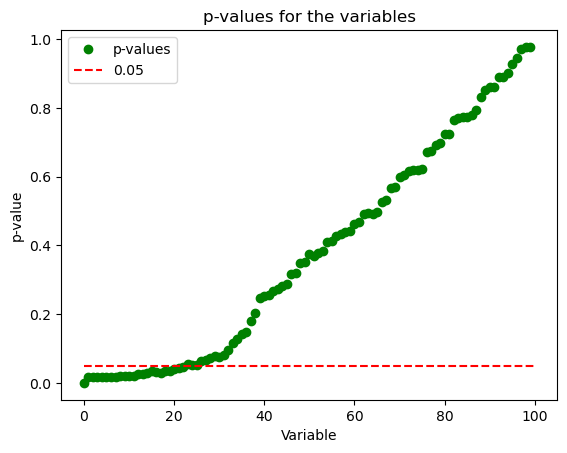

In [11]:
# Plotting the p_values against the 0.05 threshold

plt.plot(p_values, 'go', label='p-values')
plt.plot([0, 100], [0.05, 0.05], 'r--', label='0.05')
plt.xlabel('Variable')
plt.ylabel('p-value')
plt.title('p-values for the variables')
plt.legend()
plt.show()

Hence, we will be keeping around 20% of the covariates.

In [12]:
# Selecting the variables with p_value < 0.05

selected_variables = []

for k in range(len(order)):
    if p_values[k] > 0.05:
        break
    selected_variables.append(order[k])

print('The selected variables are: ', selected_variables)


The selected variables are:  [40, 7, 39, 6, 41, 8, 38, 5, 42, 9, 37, 4, 36, 10, 97, 3, 43, 11, 35, 2, 96, 12, 98]


In [13]:
# Selecting the new training and test sets according to the selected variables

FVS_train = X_train[:, selected_variables]
FVS_test = X_test[:, selected_variables]

#### a) Applying the OLS of the **sklearn** library

In [14]:
# Fitting the model to the new training set

model = LinearRegression()
model.fit(FVS_train, y_train)

LinearRegression()

#### b) Storing the R-squared coefficients

In [15]:
# Storing the R-squared of the new model

r2 = model.score(FVS_test, y_test)
df_coef.loc['Forward Variable Selection OLS', 'R-squared'] = r2
display(df_coef)

,R-squared
First OLS,0.960055
Forward Variable Selection OLS,0.95518


The R-squared coefficient is 0.955, which is very high. This means that the model explains 95,5% of the variance of the data. However, it is lower than the R-squared coefficient of the model with all the covariates. This is most certainly due to the fact that we are removing some covariates that are actually relevant.

### 4) **SequentialFeatureSelector** from **sklearn** with the same number of variables

In [16]:
# Selection of the variables using the SequentialFeatureSelector

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=len(selected_variables), direction='forward', cv=5)
sfs.fit(X_train, y_train)

# Show the selected variables

sfs.get_support(indices=True)


array([ 0,  1,  3,  7, 14, 18, 19, 21, 34, 39, 40, 44, 45, 46, 47, 48, 49,
       57, 74, 87, 90, 97, 99])

#### a) Why the 2 algorithms do not choose the same variables? Storing the R-squared coefficients

The two algorithms can return different results (as we can see in this specific situation). Actually, their method to choose the variables are different. 

Indeed, the forward variable selection uses the highest statistic test for nullity (or equivalently the lowest p-value) whereas SequentialFeatureSelector looks for the contribution to the overall R-squared.

Furthermore, the forward variable selection adds the variable one-by-one when the SequentialFeatureSelector tests every possible subset of variables of the entered size. 

In [17]:
# Selecting the new training and test sets according to the selected variables and fitting the OLS to it

SFS_train = X_train[:, sfs.get_support()]
SFS_test = X_test[:, sfs.get_support()]
model = LinearRegression()
model.fit(SFS_train, y_train)

LinearRegression()

In [18]:
# Storing the R-squared of the new model

r2 = model.score(SFS_test, y_test)
df_coef.loc['Sequential Feature Selector OLS', 'R-squared'] = r2
display(df_coef)

,R-squared
First OLS,0.960055
Forward Variable Selection OLS,0.95518
Sequential Feature Selector OLS,0.942024


The R-squared value is at 0.942 which is lower than the two previous models (0.955 and 0.96) even though it is still very high. Once again this may be due to the fact that we are removing some covariates that are actually relevant and this time we are removing some that are more relevant than with the FVS.

## **Ridge**

### 5) Coding and Running the Ridge Regression

The Ridge minimization problem is the minimization of the following quantity :

$$ \|Y - X\theta\|^2 + n \alpha \|\theta\|^2 $$

There exists a unique solution $\hat\theta_n$ for any $\alpha > 0$ :

$$ \hat\theta_n = (X^TX + n \alpha I_p)^{-1}X^TY $$

In [19]:
# Coding my own Ridge Estimator

def ridge_estimator(X,Y,alpha):
    # Get the dimensions of the data
    n,p = X.shape
    # Compute the Gram matrix and the matrix that will be inverted to get the Theta_hat
    Gram_matrix = X.T @ X
    To_be_inverted = Gram_matrix + n * alpha * np.identity(p)
    # Finally compute the Theta_hat according to the formula
    Theta_hat = np.linalg.inv(To_be_inverted) @ X.T @ Y
    return Theta_hat

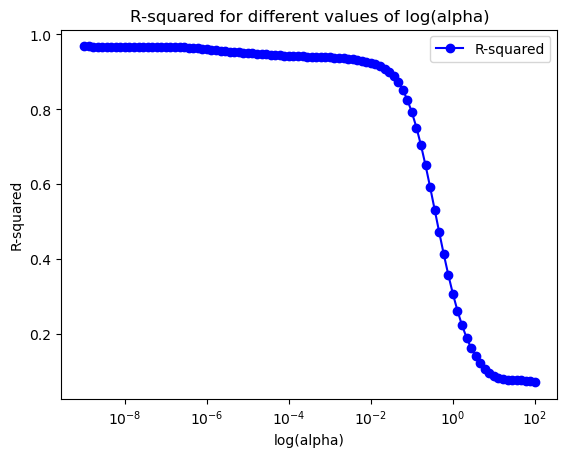

In [20]:
 # Testing for different values of alpha spaced envely on a log space 10^-9 to 10^2
 
alpha_values = np.logspace(-9, 2, 100)
# Storing the coefficients for each value of alpha
coefficients = []

r2_scores = []

for alpha in alpha_values:
	Theta_hat = ridge_estimator(X_train, y_train, alpha)
	coefficients.append(Theta_hat)
	r2_scores.append(r2_score(y_test, X_test @ Theta_hat))

plt.plot(alpha_values, r2_scores, 'b-o', label='R-squared')
plt.xscale('log')
plt.xlabel('log(alpha)')
plt.ylabel('R-squared')
plt.title('R-squared for different values of log(alpha)')
plt.legend()
plt.show()


We get very high R-squared coefficients for all the lowest values of $\alpha$. This is due to the fact that the Ridge regression is a shrinkage method. Indeed, the Ridge regression shrinks the coefficients towards 0. Hence, the higher the value of $\alpha$, the more the coefficients are shrunk towards 0 and the less the model is able to fit the data.

In terms of the form of the plot, we notice that the R-squared is quite consistant at a very high value (very slow decrease) for $\alpha < 10^{-1}$ and then there is a big slope and dcrease of the R-squared.

#### a) Plotting the evolution of the coefficients in function of $\alpha$

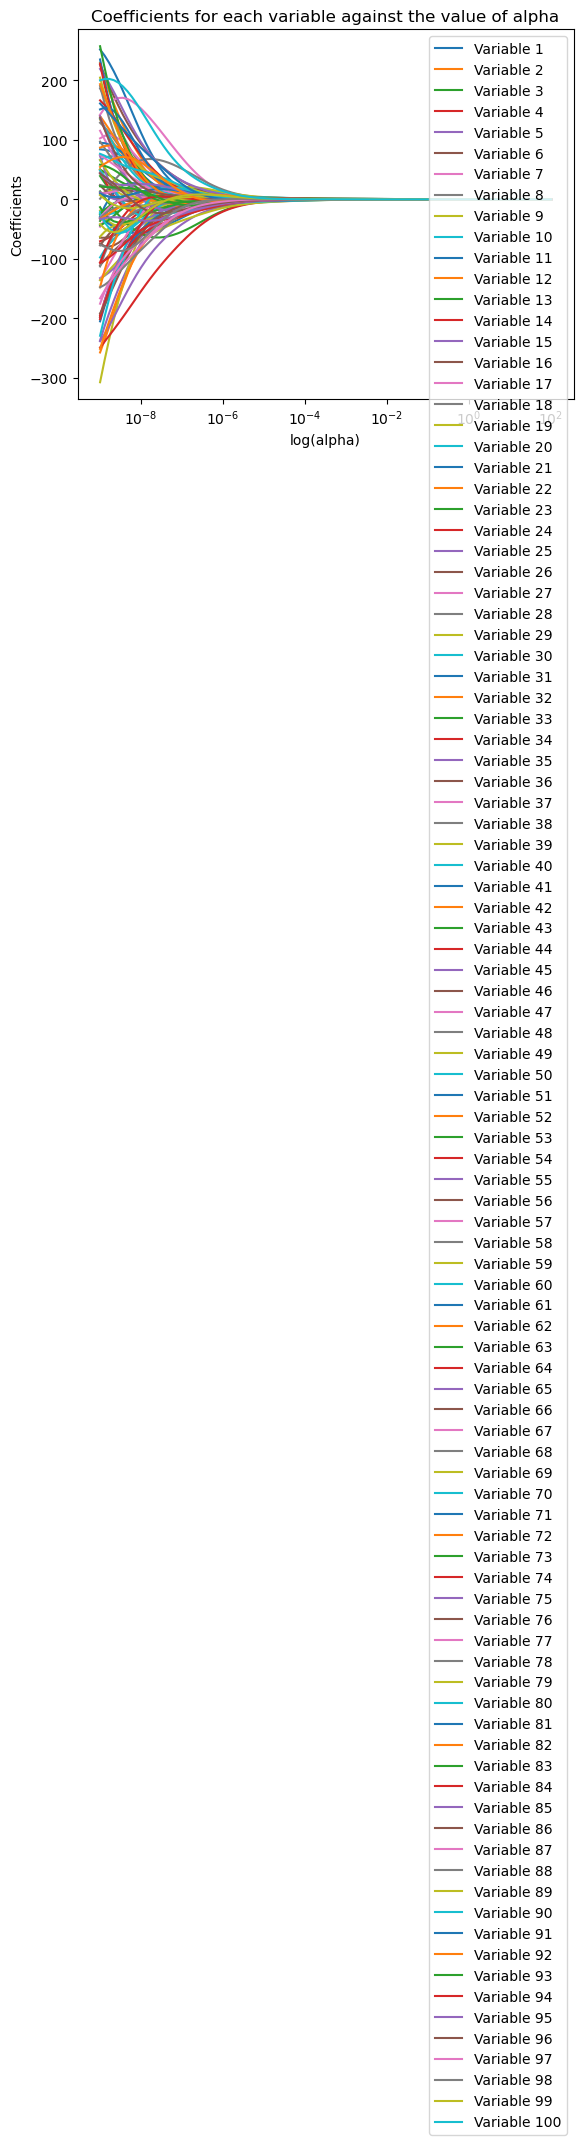

In [21]:
# Plotting the coefficients for each variable against the value of alpha

for i in range(X.shape[1]):
	plt.plot(alpha_values, [coefficients[j][i] for j in range(len(coefficients))], label='Variable ' + str(i+1))

plt.xlabel('log(alpha)')
plt.ylabel('Coefficients')
plt.xscale('log')
plt.title('Coefficients for each variable against the value of alpha')
plt.legend()
plt.show()

The plot is very large and has a lot (100 actually) of courbes. However, it is still possible to clearly distinguish the evolution of the coefficients as they converge to 0 in absolute value when $\alpha$ increases.

This is logical because when $\alpha$ increases, the penalty term increases and the coefficients are penalized more and more. Hence, they tend to converge to 0.

#### b) Changes in the MSE of the test and training sets in function of $\alpha$

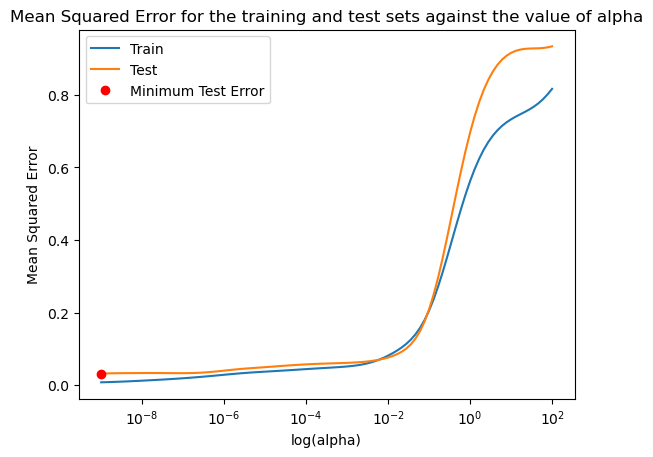

In [22]:
# Plotting the mean squared error for the training and test sets against the value of alpha

# Storing the mean squared error for the training and test sets
ridge_train = []
ridge_test = []

for alpha in alpha_values:
	Theta_hat = ridge_estimator(X_train, y_train, alpha)
	# Compute the mean squared error for the training and test sets between the prediction and the actual values
	ridge_train.append(mean_squared_error(y_train, X_train @ Theta_hat))
	ridge_test.append(mean_squared_error(y_test, X_test @ Theta_hat))

# COmpute the minimum test error to plot it on the graph
min_test = np.argmin(ridge_test)

plt.plot(alpha_values, ridge_train, label='Train')
plt.plot(alpha_values, ridge_test, label='Test')
plt.plot(alpha_values[min_test], ridge_test[min_test], 'ro', label='Minimum Test Error')
plt.xscale('log')
plt.xlabel('log(alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for the training and test sets against the value of alpha')
plt.legend()
plt.show()

When the regularization parameter $\alpha$ increases, the MSE of the test set increases. This is logical because the model is more and more penalized and loses accuracy. (when $\alpha$ is very large, the model is just a constant function, when $\alpha$ is very small, the model is the OLS model)

#### c) Storing the R-squared coefficients for the best performing $\alpha$

In [23]:
# Selecting the best alpha according to the test set

best_alpha = None
# r2 is initialized to -1 to be sure that the first value of r2 will be greater than it
best_r2 = -1

for alpha in alpha_values:
	Theta_hat = ridge_estimator(X_train, y_train, alpha)
	y_pred_test = X_test @ Theta_hat
	r2 = r2_score(y_test, y_pred_test)
	if r2 > best_r2:
		best_r2 = r2
		best_alpha = alpha
  
# adding the results to the DataFrame with the value of alpha and the R2
df_coef.loc['Ridge Regression with alpha = ' + str(best_alpha), 'R-squared'] = best_r2
display(df_coef)

,R-squared
First OLS,0.960055
Forward Variable Selection OLS,0.95518
Sequential Feature Selector OLS,0.942024
Ridge Regression with alpha = 1e-09,0.968269


The R-squared coefficient is 0.968, which is very high. This is the highest R-squared coefficient we have obtained so far. This means that the model explains 96,8% of the variance of the data.

## **Cross-validation, Lasso and Elastic Net**

### 6) Lasso Regression

The Lasso minimization problem is the minimization of the following quantity :

$$ \frac{1}{2} \|Y - X\theta\|^2 + \alpha \|\theta\|_1 $$

In [24]:
# First implementation of the Lasso estimator

# alpha varies from 10^-5 to 10^-2 on a log scale
alpha_values_lasso = np.logspace(-5, -2, 100)

# Storing the coefficients for each value of alpha
coefficients_lasso = []

for alpha in alpha_values_lasso:
	model = Lasso(alpha=alpha)
	model.fit(X_train, y_train)
	coefficients_lasso.append(model.coef_)

/Users/hugoqueniat/tensorflow-test/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+01, tolerance: 1.610e-02
  model = cd_fast.enet_coordinate_descent(
/Users/hugoqueniat/tensorflow-test/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+01, tolerance: 1.610e-02
  model = cd_fast.enet_coordinate_descent(
/Users/hugoqueniat/tensorflow-test/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

#### a) Warnings and errors with the Lasso

Those warnings, that you can see, arise because the Lasso fails to converge within the maximum number of iterations. It is due to the fact that the Lasso is not convex and that the algorithm used to solve it is not guaranteed to converge to the global minimum.

The solution can be to increase the number of iterations (to allow more time to the algorithm to converge). Furthermore, we can increase the value of parameter tol (tolerance for stopping criteria) but it would mean that we would lose precision.

In case the algorithm does not converge to the global minimum, the solution can be to decrease the value of parameter tol.

In [25]:

# Fixed version of the Lasso estimator

start = time.time()
alpha_values_lasso = np.logspace(-5, -2, 100)

# Counting the number of non-zero coefficients for each value of alpha for the next question
non_zero_coeff =[]
# Storing the mean squared error for the training and test sets for question c)
Lasso_train_MSE = []
Lasso_test_MSE = []

# To determine the best alpha and later store the associated R2 in the DataFrame
best_alpha = None
best_r2 = -1

# Storage for the R-squared for each value of alpha
lasso_r2 = []

# For each value of alpha, compute the coefficients and the mean squared error
for alpha in alpha_values_lasso:
	model = Lasso(alpha=alpha, max_iter=1000000, tol=0.01)
	model.fit(X_train, y_train)
	non_zero_coeff.append(np.count_nonzero(model.coef_))
	# Mean squared error for the training and test sets between the prediction and the actual values
	Lasso_train_MSE.append(mean_squared_error(y_train, model.predict(X_train)))
	Lasso_test_MSE.append(mean_squared_error(y_test, model.predict(X_test)))
	r2 = model.score(X_test, y_test)
	lasso_r2.append(r2)
	if r2 > best_r2:
		best_r2 = r2
		best_alpha = alpha
 
print ('Time taken to run the Lasso estimator: ', time.time() - start)

Time taken to run the Lasso estimator:  218.50046014785767


For the first time I have used `time` to measure the time it takes to run the algorithm. On my computer, it takes more than 3 and a half minutes when it took maximum 10 seconds for all the previous models.

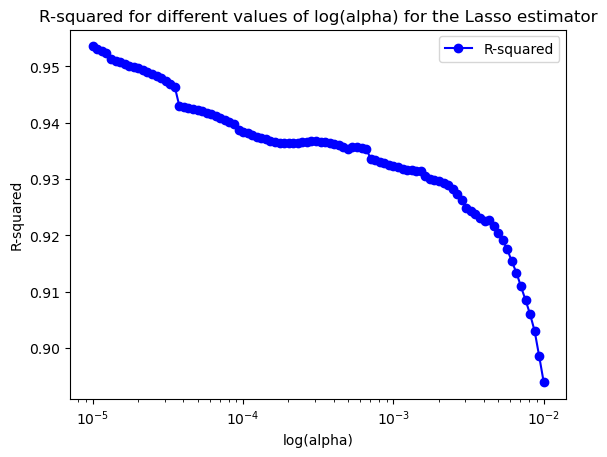

In [26]:
# Plotting the R-squared for each value of alpha

plt.plot(alpha_values_lasso, lasso_r2, 'b-o', label='R-squared')
plt.xlabel('log(alpha)')
plt.xscale('log')
plt.ylabel('R-squared')
plt.legend()
plt.title('R-squared for different values of log(alpha) for the Lasso estimator')
plt.show()


Much like the Ridge regression, the Lasso regression shrinks the coefficients towards 0 because of its penalization term. Hence, the higher the value of $\alpha$, the more the coefficients are shrunk towards 0 and the less the model is able to fit the data (as we can see in the plot below, with the R-squared coefficient decreasing when $\alpha$ increases).

#### b) Plotting the number of non-zero coefficients in function of $\alpha$

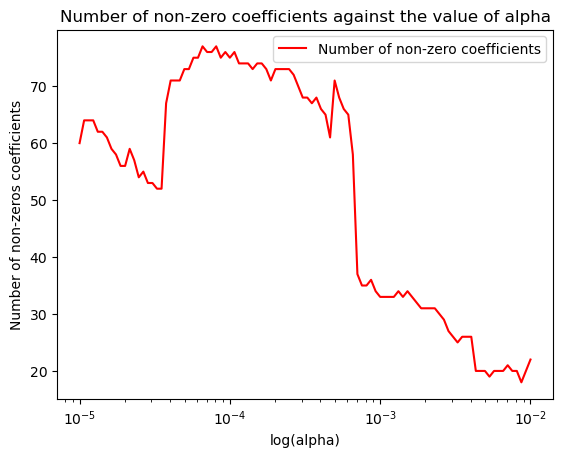

In [27]:
# Plot the number of non-zero coefficients against the value of alpha

plt.plot(alpha_values_lasso, non_zero_coeff, 'r-', label='Number of non-zero coefficients')
plt.xlabel('log(alpha)')
plt.ylabel('Number of non-zeros coefficients')
plt.xscale('log')
plt.legend()
plt.title('Number of non-zero coefficients against the value of alpha')
plt.show()

We can observe that, in dynamic, the number of non-zero coefficients decreases when $\alpha$ increases. This is logical because when $\alpha$ increases, as in the Ridge situation, the penalty term increases and the coefficients are penalized more and more. Hence, they tend to converge to 0.

#### c) Changes in the MSE with $\alpha$

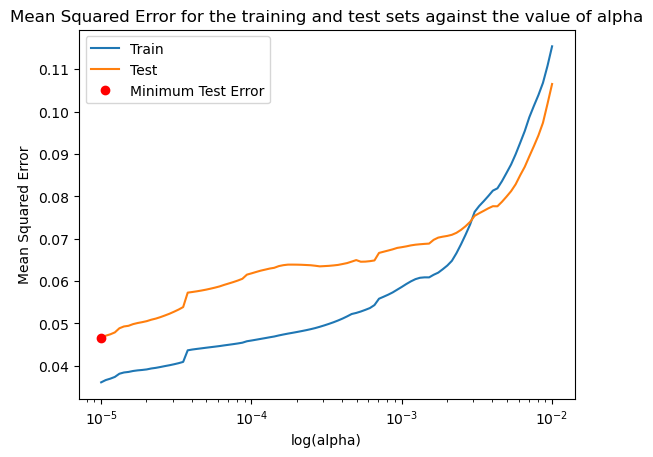

In [28]:
# Plotting the mean squared error for the training and test sets against the value of alpha and extracting the minimum test error


Lasso_min_test = np.argmin(Lasso_test_MSE)
plt.plot(alpha_values_lasso, Lasso_train_MSE, label='Train')
plt.plot(alpha_values_lasso, Lasso_test_MSE, label='Test')
plt.plot(alpha_values_lasso[Lasso_min_test], Lasso_test_MSE[Lasso_min_test], 'ro', label='Minimum Test Error')
plt.xscale('log')
plt.xlabel('log(alpha)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Mean Squared Error for the training and test sets against the value of alpha')
plt.show()

Once again, when the regularization parameter $\alpha$ increases, the MSE of the test set increases. The minimum is reached for the minimum value of $\alpha$.

#### d) Storing the R-squared coefficients for the best performing $\alpha$

In [29]:
# Adding the results to the DataFrame with the best performing value of alpha and the associated R2

df_coef.loc['Lasso Regression with alpha = ' + str(best_alpha), 'R-squared'] = best_r2
display(df_coef)

,R-squared
First OLS,0.960055
Forward Variable Selection OLS,0.95518
Sequential Feature Selector OLS,0.942024
Ridge Regression with alpha = 1e-09,0.968269
Lasso Regression with alpha = 1e-05,0.953578


The R-squared coefficient is 0.953, which is still very high. Though, it is not really better than the others and way longer to compute on the size of the dataset we are using. Thus, I would not really recommend using the Lasso in this situation and with this size of dataset.

### 7) Cross-validation + Elastic Net

The Elastic Net is a linear regression with combined L1 and L2 priors as regularizer. The Elastic Net minimization problem is the minimization of the following quantity :

$$ \frac{1}{2} \|Y - X\theta\|^2 + \alpha \rho \|\theta\|_1 + \frac{\alpha(1-\rho)}{2} \|\theta\|^2 $$

where $\rho \in [0,1]$ is the **l1_ratio** parameter.

Since we are going to control the L1 and L2 penalties separately, we can verify than this is equivalent to :

$$ a * ||w||_1 + b * 0.5 * ||w||^2_2 $$

where $\alpha = a + b$ and $\rho = \frac{a}{a+b}$.

In [30]:
# Cross-validation

def cross_validation(X, y, alpha_ridge, alpha_lasso, n_folds=5):
    # Compute the number of samples and the step size for dividing the data into folds
    n_samples = X.shape[0]
    step_size = n_samples // n_folds
    
    # storing the mse for each fold
    r2 = []
    for i in range(n_folds):
        # Compute the indices for the current fold
        start_index = i * step_size
        end_index = (i + 1) * step_size if i < n_folds - 1 else n_samples
        test_indices = list(range(start_index, end_index))
        train_indices = [j for j in range(n_samples) if j not in test_indices]
        
        # Split the data into training and test sets
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]
        if alpha_lasso > 0:
            a = alpha_lasso + alpha_ridge
            b = alpha_lasso / (alpha_lasso + alpha_ridge)
            model = ElasticNet(alpha=a, l1_ratio=b, max_iter=1000000, tol=0.0001)
            model.fit(X_train, y_train)
            r2.append(model.score(X_test, y_test))
        else:
            theta_hat = ridge_estimator(X_train, y_train, alpha_ridge)
            y_test_pred  = X_test @ theta_hat
            r2.append(r2_score(y_test, y_test_pred))
        
        # Compute the mse on the test set
        
    # Return the mean of the r-squared
    return np.mean(r2)


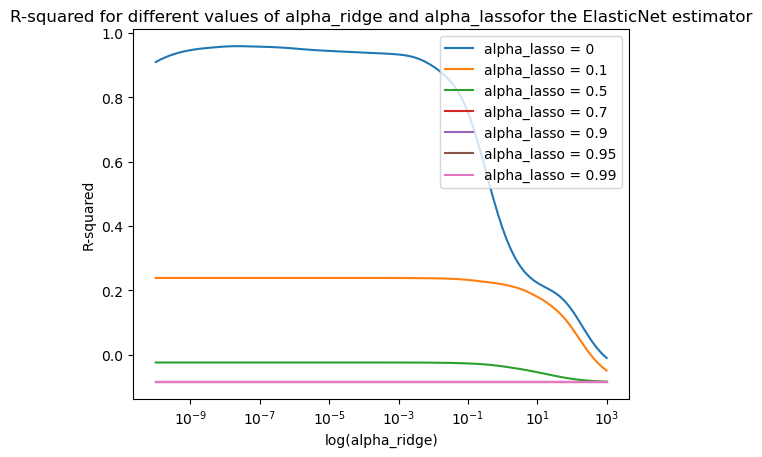

In [31]:
# Testing it with the alpha values given in the question

alpha_lasso_values = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
alpha_ridge_values = np.logspace(-10, 3, 100)

ElasticNet_R2 = [[] for i in range(len(alpha_ridge_values))]
for i in range(len(alpha_ridge_values)):
    for j in range(len(alpha_lasso_values)):
        ElasticNet_R2[i].append(cross_validation(X_train, y_train, alpha_ridge_values[i], alpha_lasso_values[j]))

for i in range(len(alpha_lasso_values)):
	plt.plot(alpha_ridge_values, [ElasticNet_R2[j][i] for j in range(len(ElasticNet_R2))], label='alpha_lasso = ' + str(alpha_lasso_values[i]))
plt.xlabel('log(alpha_ridge)')
plt.xscale('log')
plt.ylabel('R-squared')
plt.legend()
plt.title('R-squared for different values of alpha_ridge and alpha_lassofor the ElasticNet estimator')
plt.show()

		

We can see that the Lasso penalization term is really powerful (especially with those high values, the lowest non-zero $\alpha_{Lasso}$ is already 10 times higher than in the previous question). As a result, the only good R-squared that we get is when $\alpha_{Lasso} = 0$.  However, when the L2/Ridge penalization increases too then the R-squared dramatically decreases aswell.

The model becomes so weak when the penalizations are high that the R-squared is negative. This means that the model is worse than the constant model. This because the variable are too constrained and it can no longer capture well the relationships within the data.

The plots look horizontal for most, this confirms what with observed with the Ridge regression where the R-squared remains very high for lots of small values of $\alpha_{Ridge}$ but then decreases massively around 10e-1.

Finally, we can say that the cross-validation allows for a much quicker computation in comparison to the Lasso. Indeed, the Lasso takes more than 3 and a half minutes to run whereas the cross-validation takes a few seconds.

## **Bootstrap**

### 8) 50 Bootstrap samples from only variable 40 of the original dataset

#### Regression Line just with variable 40

In [32]:
# Using variable 40 from the original dataset

X_bootstrap = np.array(table.iloc[:, 40])


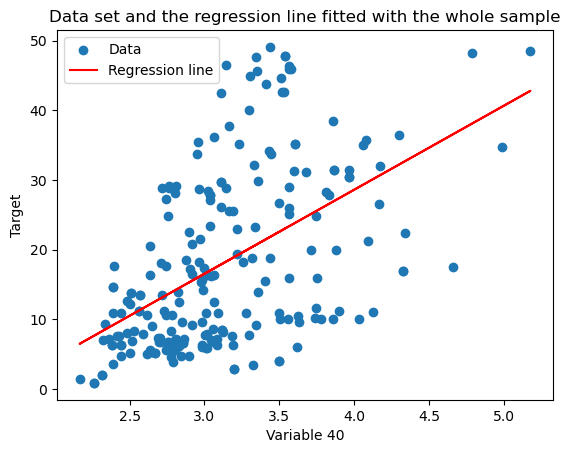

In [33]:
# Plot the data set and the regression line fitted with the whole sample

# Fitting the regression line
model = LinearRegression()
model.fit(X_bootstrap.reshape(-1, 1), y)

# Plotting the data
plt.scatter(X_bootstrap, y, label='Data')
# Plotting the regression line
plt.plot(X_bootstrap, model.predict(X_bootstrap.reshape(-1, 1)), 'r-', label='Regression line')
plt.xlabel('Variable 40')
plt.ylabel('Target')
plt.legend()
plt.title('Data set and the regression line fitted with the whole sample')
plt.show()

We observe that the regression line looks accurate according the repartition of the scatter plot. However, the data is really scattered so this model is not really accurate to predict the value of the target variable.

#### Regression Lines with the 50 Bootstrap samples

To calculate the prediction interval, we use this specific result from the lecture notes :

$$ \frac{Y - \beta_0 - \beta_1 x}{\hat\sigma_n\sqrt{1 + \frac{1}{n} + \frac{(x - \overline{x}^n)^2}{\sum_{i=1}^{n} (x_i - \overline{x}^n)^2}}} \sim t_{n-2} $$

where $n$ is the number of observations.

In [34]:
# Function to compute the prediction interval for a given model

def prediction_interval(X, y, model, alpha=0.05):
    # get the number of observations in X
    n = X.shape[0]
    # predict y values using the model
    y_pred = model.predict(X)
    # calculate residuals
    residuals = y - y_pred
    # estimate the standard deviation of the residuals
    sigma_hat = np.sqrt(np.sum(residuals**2) / (n - 2))
    # calculate the mean and variance of X
    x_mean = np.mean(X)
    x_std = np.sum((X - x_mean)**2)
    # calculate the t-value for the given alpha and degrees of freedom
    t = stats.t.ppf(1 - alpha / 2, n - 2)
    # storage for the lower and upper bounds for the prediction interval for each observation
    lower, upper = [], []
    for i in range(n):
        # calculate the lower and upper bounds using the formula for the prediction interval
        lower.append(y_pred[i] - t * sigma_hat * np.sqrt(1 + 1 / n + (X[i] - x_mean)**2 / x_std))
        upper.append(y_pred[i] + t * sigma_hat * np.sqrt(1 + 1 / n + (X[i] - x_mean)**2 / x_std))
    # return the lower and upper bounds
    return lower, upper


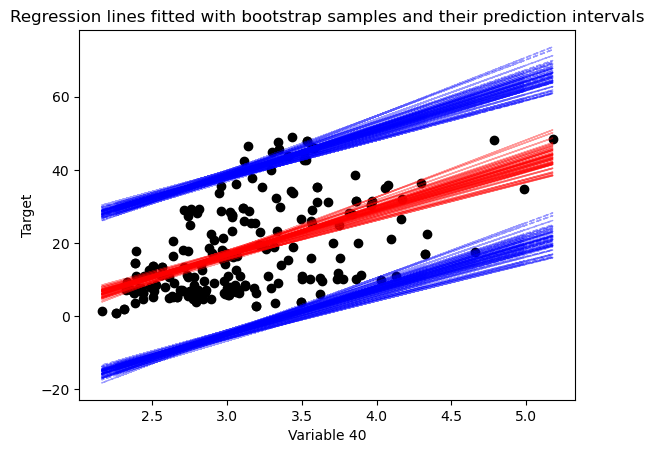

In [35]:
# Generating 50 bootstrap samples and fitting a regression model to each of them

n_bootstraps = 50

n = len(X_bootstrap)


for i in range(n_bootstraps):
    # Generate random indices
	indices = np.random.choice(np.arange(n), size=n, replace=True)
	Regression = LinearRegression()
	Regression.fit(X_bootstrap[indices].reshape(-1, 1), y[indices])
	lower , upper = prediction_interval(X_bootstrap.reshape(-1, 1), y, Regression)
	# Plot the regression line
	plt.plot(X_bootstrap, Regression.predict(X_bootstrap.reshape(-1, 1)), 'r-', linewidth=1, label='Regression Line', alpha=0.4)
	plt.plot(X_bootstrap, lower, 'b--', linewidth=1, alpha=0.4, label='Prediction Interval lower bound')
	plt.plot(X_bootstrap, upper, 'b--', linewidth=1, alpha=0.4, label='Prediction Interval upper bound')
plt.scatter(X_bootstrap, y, color ='black', label='Data')
plt.xlabel('Variable 40')
plt.ylabel('Target')
plt.title('Regression lines fitted with bootstrap samples and their prediction intervals')
plt.show()

We can see tgat the prediction interval is very large and that it is not very accurate. This is due to the fact that we are using only one variable to predict the target variable.

Hence, the model is not very accurate. We notice also that the scatter plot is not very linear (points are really scattered), thus not helping the model.

## **PCA**

### 9) Compute the covariance matrix and its SVD decomposition

In [36]:
# Computation of the covariance matrix and its SVD decomposition

covariance_matrix = np.cov(X_train, rowvar=False)

U , s , V = np.linalg.svd(covariance_matrix)

#### a) Heatmap of the covariance matrix

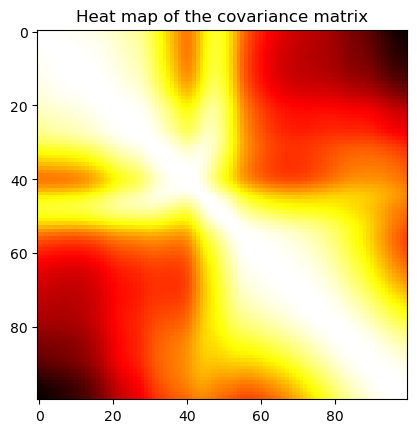

In [37]:
# Showing the heat map of the covariance matrix

plt.imshow(covariance_matrix, cmap='hot', interpolation='nearest')
plt.title('Heat map of the covariance matrix')
plt.show()

Along the diagonal, we have bright colors which means that the covariance is positive which is logical because along the diagonal we have the same variable, thus the covariance is actually the variance and is always positive.

By the brightness of the colors, we can see that the covariance is higher (higher correlation) between the covariates that are close to each other (not only the single diagonal but a larger diagonal).

Furthermore, covariates around the 45th-50th seem to be more correlated to the first 50 than the others.



#### b) Computation of the principal components

In [38]:
# Principal components

PC = np.dot(X_train, U)


#### c) Explained variance ratio

The total variance is sum of all the variances. However, the diagonal of the covariance matrix is the variance of each variable. Thus, the total variance is the sum of the diagonal of the covariance matrix, hence the trace of the covariance matrix.

Furthermore, the trace of the covariance matrix is equal to the sum of the eigenvalues of the covariance matrix.

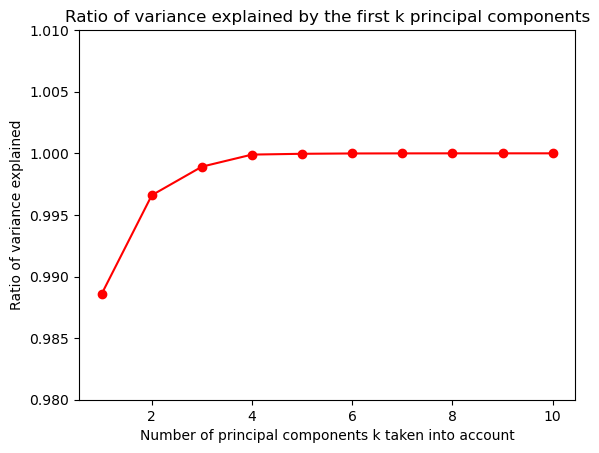

In [39]:
# Computing the variance explained by the first k principal components

# Compute the eigenvalues of the covariance matrix
eigenvalues = np.linalg.eigvals(covariance_matrix)

# Compute the total variance
total_variance = 0
for element in eigenvalues:
    total_variance += element

# List to store the amount of variance explained by the first k components
variance_explained = []

# Number of principal components to show
n_pc = min (len(s), 10)
for k in range(1, n_pc+1):
    sum = 0
    for i in range(k):
        sum += eigenvalues[i]
    variance_explained.append(sum/total_variance)

# Plot the results
plt.plot(range(1, n_pc+1), variance_explained, 'r-o')
plt.ylim(0.98, 1.01)
plt.xlabel('Number of principal components k taken into account')
plt.ylabel('Ratio of variance explained')
plt.title('Ratio of variance explained by the first k principal components')
plt.show()



The very first selected principal component explains almost 99% of the variance. From the first four we can explain almost 100% of the variance.

#### d) Projecting the data on the first two principal components

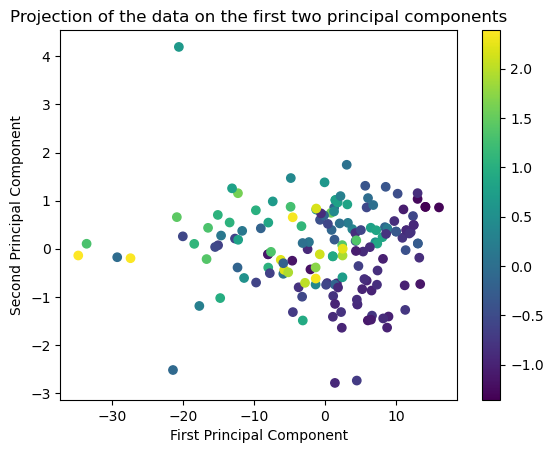

In [40]:
# Projection of the data on the first two principal components in comparison with the target

pca1 = PC[:, 0]
pca2 = PC[:, 1]
plt.scatter(pca1, pca2, c=y_train, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Projection of the data on the first two principal components')
plt.colorbar()
plt.show()



We can see that the colors are rather well separated (we can distinguish a progression between bright colors on the left and dark colors on the right). This means that the two first principal components are quite good to discriminate the data (it is not perfect there are still some yellow points among the dark blue ones). 

Furthermore, we observe that PC1 has a much larger magnitude than PC2 (-30 to 20 scale against -3 to 4). This means that PC1 is much more important than PC2 and contributes more to the overall variation of the data.

#### e) OLS regression on the projected data

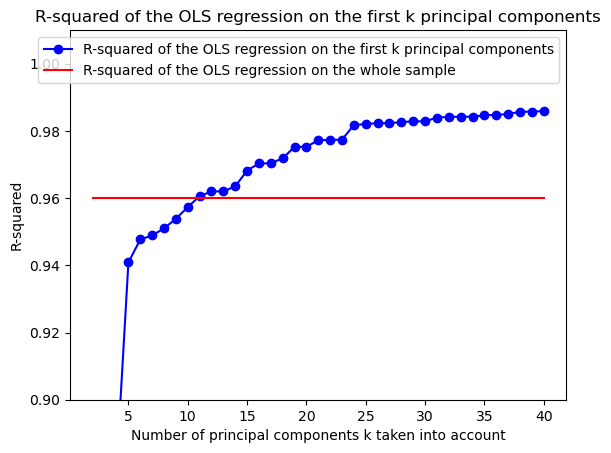

In [43]:
# Running the OLS regression on the first k principal components

p = X_train.shape[1]
best_score_pca = -1
best_k = None
k_values = range(2, p + 1)

r2_scores = []

for k in k_values:
    pca_X = X_train.dot(U[:, :k])
    pca_model = LinearRegression()
    pca_model.fit(pca_X, y_train)
    pca_y_pred = pca_model.predict(pca_X)
    r2 = r2_score(y_train, pca_y_pred)
    if r2 > best_score_pca:
        best_score_pca = r2
        best_k = k
    r2_scores.append(r2)

plt.plot(range(2,41), r2_scores[:39], 'b-o', label='R-squared of the OLS regression on the first k principal components')
plt.plot(range(2,41), [df_coef['R-squared'].values[0] for i in range(39)], 'r-', label='R-squared of the OLS regression on the whole sample')
plt.xlabel('Number of principal components k taken into account')
plt.ylabel('R-squared')
plt.title('R-squared of the OLS regression on the first k principal components')
plt.ylim(0.90, 1.01)
plt.legend()
plt.show
plt.show()


We can see that the PCA is very efficient in reducing the dimension of the data. Already with 13 principal components, we get a higher R-squared coefficient than with the OLS regression on the original data. Then it continues to increase with the number of principal components.

In [44]:
# Storing the highest R-squared value and the corresponding number of principal components


df_coef.loc['OLS with PCA using ' + str(best_k) + ' components'] = best_score_pca
display(df_coef)

,R-squared
First OLS,0.960055
Forward Variable Selection OLS,0.95518
Sequential Feature Selector OLS,0.942024
Ridge Regression with alpha = 1e-09,0.968269
Lasso Regression with alpha = 1e-05,0.953578
OLS with PCA using 100 components,0.995789


This is by quite a margin the highest R-squared coefficient we have obtained so far. This means that the model explains 99,6% of the variance of the data. Thus, the PCA method is very efficient in this case. The best case scenario is the one where we include all the variables in the model, which is the one we have obtained here, with the PCA method, so by sorting the variables by importance.

## **Comparison of the models**

### 10) Summary of the results

Let's rotate back through all the models we have used and compare them.

#### **OLS regression**

The OLS is the simplest model we have used. It just performs a minimization of the Mean squared error. Thus, it is relatively fast to compute. Furthermore, we obtained a very high R-squared coefficient of 0.960 which is among the highest scores in comparison to the other models. However, the OLS may be less efficient when the number of variables increases because it is to not able to reduce the dimensionality of the data : it does not select the most important variables.

#### **Variable selection**

The variable selection is a method that allows us to reduce the dimensionality of the data by selecting the most important variables. We can see that with both methods of variable selection, the R-squared coefficient is still very high. However, the OLS on the whole dataset is still the best model we have obtained up to variable, by a small margin. The variable selection has the advantage to allow us to work on much less variables, thus reducing the computation time when the dataset is very large (even though we still have some computation time to do the variable selection).

#### **Ridge regression**

The Ridge model bases itself on the MSE, much like the OLS, but it adds a penalty term to the MSE. This penalty term is the sum of the squared coefficients (the squared L2 norm). Thus, the Ridge model is able to, in part, reduce the dimensionality of the data by reducing the coefficients of the less important variables. However, it still considerates all the variables (no selection) so the reduction is limited. We still obtained a very high R-squared coefficient of 0.968 which is slighly higher than the OLS. However, the Ridge model is more efficient when the number of variables increases,and, although it is not the most efficient in this case, we should expect the gap to become bigger between those two models when the dataset increases.


#### **Lasso regression**

The Lasso model is very similar to the Ridge model. It also bases itself on the MSE but it adds a penalty term to the MSE. This penalty term is the sum of the absolute values of the coefficients (this time the L1 norm, which is the difference with the Ridge). First, one of the inconvenient with the Lasso minimization, before we even begin to implement it, is that there is no closed form solution for the minimization problem whereas the Ridge has a closed form solution. Thus, we have to use an iterative method to solve the minimization problem. This is a reason to explain why the Lasso is much slower to compute than the Ridge. However, the Lasso is able to select the most important features since, as we saw, it sets some coefficients to 0. Thus, it is able to reduce the dimensionality of the data. We obtained a very high R-squared coefficient of 0.953 which is slighly lower than the OLS and the Ridge. However, the Lasso model is more efficient when the number of variables increases, and, although it is not the most efficient in this case, its efficiency should increase when the dataset increases.

#### **Cross-validation with Elastic Net**

The cross-validation was really successful in terms of computation time, especially comparign it to the Lasso we have seen at the previous point. However, I feel we used with the wrong parameters for the Elastic Net because we did not obtain interesting results.
The Elastic Net is a combination of the Ridge and the Lasso. It bases itself on the MSE but it adds a penalty term to the MSE. This penalty term is a combination of the L1 and L2 norms. Thus, it is able to select the most important features and reduce the dimensionality of the data by shrinking coefficients down to 0.


#### **Bootstrap**

The Bootstrap method allowed us to compute the prediction interval of the linear regression on one variable. We can see that the prediction interval is very large and that it is not very accurate. This is due to the fact that we are using only one variable to predict the target variable. However, it is still a good method to compute the prediction interval without making any assumption on the distribution of the data.

#### **PCA**

The PCA method is very efficient in reducing the dimensionality of the data. We saw that with only 13 principal components, we get a higher R-squared coefficient than with the OLS regression on the original data. Then it continues to increase with the number of principal components. Indeed, it allows us to focus on the most important features (we have seen that the first principal component explains most of the covariance). This is by quite a margin the highest R-squared coefficient we have obtained so far with a score of 0.996. This means that the model explains 99,6% of the variance of the data. Thus, the PCA method is very efficient in this case. The best case scenario is the one where we include all the variables in the model, which is the one we have obtained here, with the PCA method, so by sorting the variables by importance. However, even when using a lower number variable we can get higher results than with the other models. Finally, it is relatively quick to compute so it is not a problem (in comparison to the Lasso or Elastic Net for example).


